# Практическая работа №1: Алгоритмы эффективного вычисления одночленов

Выполнила студентка гр. 1303 Хабибуллина Алина. Вариант №22.

## Цель работы

Сформировать знания о работе алгоритмах вычисления одночленов за
минимальное число операций, привить навык использования систем компьютерной математики для реализации алгоритмов.

## Основные теоретические положения

Рассмотрим некоторые теоретические сведения о методах, которые будут рассмотрены в данной практической работе.
Также введем следующие обозначения:

$ \lambda(n) = \lfloor log_2(n) \rfloor $ - длина бинарной записи n, уменьшенная на 1.

$ \nu(n) $- вес Хэмминга (количество едениц в бинарной записи числа $ n $)

### Бинарный метод "SX"

 1. Представляем число n в двоичной записи: $ n = (a_m, a_{m-1},..., a_2, a_1)_2 $,  $ a_m = 1 $
   
 2. Отбрасываем старший бит: $ n = (a_{m-1}, a_{m-2},..., a_2, a_1)_2 $
  
 3. Делаем замену по следующему правилу:
  
   $a_i = 1 \Rightarrow a_i = SX $
  
   $a_i = 0 \Rightarrow a_i = S $
   
 4. Выполним вычисления в соответствии с полученой строкой. Идем по строке слева направо и выполняем следующие действия для получения $ x^n $:
 
   $ S $ - возведение в квадрат; $ X $ - умножение на $ x $.
   
   Количество операций метода: $ \lambda(n) + \nu(n) - 1 $

### Бинарный метод возведения в степень справа налево

  1. Инициализируем следующие значения:
  
  $ N = n $ ; $ Y = 1 $ ; $ Z = x $.
  
  2. Если $ N $ четное: $ N = \lfloor N/2 \rfloor $ ; $ Z = Z \cdot Z $ и снова возвращаемся к проверке на четность.
  
   Иначе: $ N = \lfloor N/2 \rfloor $ ; $ Y = Z \cdot Y $.
   
  3. Если $ N = 0 $, то $ Y $ - это результат работы алгоритма
  
   Иначе: $ Z = Z \cdot Z $ и возвращаемся к пункту 2.
  
  Количество операций метода: $ \lambda(n) + \nu(n) $
  
### Метод множителей

  1. Представим $n = p \cdot q$, где $p$ - наименьший простой множитель , $q > 1 \Rightarrow $ 
  $x^n$ можно найти, вычислив $x^p$ и возведя эту величину в степень $q$.\
  То есть надо вычислить $(x^p)^q$.
  
  2. Если $n$ - простое число, то вычислим $x^{n-1}$ и умножим полученное значение на $x$.
  
  3. Если $n = 0$ , то получаем $x^n$ без всяких вычислений.
  
### Дерево степеней
  
  1. На нулевом уровне $k = 0$ только один узел равный 1.
  Построим $k+1$ уравнь.
  
  2. Берем каждый узел $n$ на $k$-ом уровне слева направо и присоединяем к нему снизу узлы:
  
  $ n + a_0, n + a_1, n + a_2,..., n + a_{k-1} = 2 \cdot n$
  
  3. Порядок присоединения важен.
  
  $\{a_i\}_{i=0}^{k-1}$ , где $a_0 = 1$ представляют собой путь от корня дерева до узла $n$.
  
  4. Если какой-то узел уже появлялся ранее - устраняем его.

## Постановка задачи

Реализовать алгоритмы вычисления мономов за минимальное число операций с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

## 1. Бинарный метод "SX"

Реализуем бинарный метод "SX" в функции SX_bin(n). $n$- степень, в которую необходимо возвести $x$. Функция выполняет действия прописанные выше в основных теоретических положениях.
Программа выводит строку после преобразования, промежуточные результаты на каждой итерации и общее количество затраченных итераций. 

In [8]:
def SX_bin(n):
    n_bin = str(bin(n)[3:]) #переводим число n в двоичную СС
    change_to_SX = n_bin.replace('1', 'SX') #сначала заменяем единицы на SX
    change_to_SX = change_to_SX.replace('0', 'S') #затем заменяем нули на S
    print("Строка после преобразований: ", change_to_SX)
    
    #выполняем действия в соответствии с симводами в строке 
    count_iter = 0
    answer = x
    for i in change_to_SX:
        if i == 'S':
            answer *= answer #возводим в квадрат
        else:
            answer *= x #умножаем на x
        count_iter+=1
        print(f'{count_iter}: {answer}') #выводим результат после каждой итерации
    print("Количество итераций: ", count_iter)

In [16]:
SX_bin(23)

Строка после преобразований:  SSXSXSX
1: x^2
2: x^4
3: x^5
4: x^10
5: x^11
6: x^22
7: x^23
Количество итераций:  7


In [17]:
SX_bin(975)

Строка после преобразований:  SXSXSXSSSXSXSXSX
1: x^2
2: x^3
3: x^6
4: x^7
5: x^14
6: x^15
7: x^30
8: x^60
9: x^120
10: x^121
11: x^242
12: x^243
13: x^486
14: x^487
15: x^974
16: x^975
Количество итераций:  16


In [18]:
SX_bin(36)

Строка после преобразований:  SSSXSS
1: x^2
2: x^4
3: x^8
4: x^9
5: x^18
6: x^36
Количество итераций:  6


Проведем оценку результатов:
1. $n = 23 \Rightarrow \lambda(n) = log_2(n) = 4$ ;
$ \lambda(n) + \nu(n) - 1 = 4 + 4 - 1 = 7 $ - Верно.

2. $n = 975 \Rightarrow \lambda(n) = log_2(n) = 9$ ;
$\lambda(n) + \nu(n) - 1 = 9 + 8 - 1 = 16$ - Верно.

3. $n = 36 \Rightarrow \lambda(n) = log_2(n) = 5$ ;
$\lambda(n) + \nu(n) - 1 = 5 + 2 - 1 = 6$ - Верно.

### Вывод
Написана программа реализующая бинарный метод. Данный метод прост в реализации, позволяет быстро вычислить одночлен. Также рассмотрено количество операций необходимых для решения данным методом и проведена их оценка.


## 2. Бинарный метод возведения в степень справа налево

В функции right_to_left(n) реализован бинарный алгоритм возведения в степень справа налево. $n$- степень, в которую необходимо возвести $x$. Функция работает в соответствии с описанным выше алгоритмом. На выходе получаем промежуточные значения всех переменных для каждой итерации. Также для лучшей наглядности организуем все значения в таблицу.

In [6]:
def right_to_left(n):
    N = n
    Y = 1
    Z = x
    count_iter = 0
    print(f'{count_iter} : N = {N} , Y = {Y} , Z = {Z} ')
    #выполняем алгоритм пока N не будет равно нулю
    while(N != 0):
        if N%2 == 0:
            N = floor(N/2) #Деление на цело
            Z *= Z
        else:
            N = floor(N/2)
            Y *= Z
            if N != 0:
                Z *= Z
        count_iter += 1
        print(f'{count_iter} : N = {N} , Y = {Y} , Z = {Z} ')

In [3]:
right_to_left(23)

0 : N = 23 , Y = 1 , Z = x 
1 : N = 11 , Y = x , Z = x^2 
2 : N = 5 , Y = x^3 , Z = x^4 
3 : N = 2 , Y = x^7 , Z = x^8 
4 : N = 1 , Y = x^7 , Z = x^16 
5 : N = 0 , Y = x^23 , Z = x^16 


| **Итерации** | **Значение N** | **Значение Y** | **Значение Z** |
|:------------:|:--------------:|:--------------:|:--------------:|
|       0      |       23       |        1       |        X       |
|       1      |       11       |        X       |       X^2      |
|       2      |        5       |       X^3      |       X^4      |
|       3      |        2       |       X^7      |       X^8      |
|       4      |        1       |       X^7      |      X^16      |
|       5      |        0       |      X^23      |      X^16      |

In [4]:
right_to_left(55)

0 : N = 55 , Y = 1 , Z = x 
1 : N = 27 , Y = x , Z = x^2 
2 : N = 13 , Y = x^3 , Z = x^4 
3 : N = 6 , Y = x^7 , Z = x^8 
4 : N = 3 , Y = x^7 , Z = x^16 
5 : N = 1 , Y = x^23 , Z = x^32 
6 : N = 0 , Y = x^55 , Z = x^32 


| **Итерации** | **Значение N** | **Значение Y** | **Значение Z** |
|:------------:|:--------------:|:--------------:|:--------------:|
|       0      |       55       |        1       |        x       |
|       1      |       27       |        x       |       x^2      |
|       2      |       13       |       x^3      |       x^4      |
|       3      |        6       |       x^7      |       x^8      |
|       4      |        3       |       x^7      |      x^16      |
|       5      |        1       |      x^23      |      x^32      |
|       6      |        0       |      x^55      |      x^32      |

In [5]:
right_to_left(112)

0 : N = 112 , Y = 1 , Z = x 
1 : N = 56 , Y = 1 , Z = x^2 
2 : N = 28 , Y = 1 , Z = x^4 
3 : N = 14 , Y = 1 , Z = x^8 
4 : N = 7 , Y = 1 , Z = x^16 
5 : N = 3 , Y = x^16 , Z = x^32 
6 : N = 1 , Y = x^48 , Z = x^64 
7 : N = 0 , Y = x^112 , Z = x^64 


| **Итерации** | **Значение N** | **Значение Y** | **Значение Z** |
|:------------:|:--------------:|:--------------:|:--------------:|
|       0      |       112      |        1       |        x       |
|       1      |       56       |        1       |       x^2      |
|       2      |       28       |        1       |       x^4      |
|       3      |       14       |        1       |       x^8      |
|       4      |        7       |        1       |      x^16      |
|       5      |        3       |      x^16      |      x^32      |
|       6      |        1       |      x^48      |      x^64      |
|       7      |        0       |      x^112     |      x^64      |

Проведем оценку результатов:
1. $n = 23 \Rightarrow \lambda(n) = log_2(n) = 4$ ;
$ \lambda(n) + \nu(n) = 4 + 4 = 8 $ - Верно.

2. $n = 55 \Rightarrow \lambda(n) = log_2(n) = 5$ ;
$\lambda(n) + \nu(n) = 5 + 5 = 10$ - Верно.

3. $n = 112 \Rightarrow \lambda(n) = log_2(n) = 6$ ;
$\lambda(n) + \nu(n) = 6 + 3= 9$ - Верно.

### Вывод
Реализован бинарный метод возведения числа в степень справа налево. Рассмотрены промежуточные результаты и количество итераций необходимых для выполнения метода. Также проведена оценка результатов.

## 3. Сравнение бинарного метода SX и метода возведения в степень справа налево

Можно отметить, что бинарный метод SX не только проще в выполении, но и затрачивает меньшее количество операций чем метод возведения в степень справа налево. Бинарный метод выполняется за $\lambda(n) + \nu(n) -1$ операций, в то время как метод возведения в степень справа налево - за $\lambda(n) + \nu(n)$ операций.

## 4. Метод множителей

Вручную выполним вычисления методом множителей для некоторых n.\
Для сравнения ниже также будем запускать работу метода "SX".

1. $ n=55 = 5 \cdot 11 $\
$ x^{55} = (x^5)^{11} $\
$x^5 = x^4 \cdot x$ - 2 оперции($x^4$) + 1 операция\
$x^4 = (x^2)^2 $ - 2 операции\
Чтобы получить $x^5$ необходимо 3 операции\
$ x^{11} = x^{10} \cdot x $ - 4 операции($x^{10}$) + 1 операция\
$ x^{10} = (x^5)^2 $ - 3 операции($x^5$) + 1 операция\
Чтобы получить $x^{11}$ необходимо 5 операций\
Итого $3 + 5 = 8$ операций.

Решение бинарным методом "SX":

In [9]:
SX_bin(55)

Строка после преобразований:  SXSSXSXSX
1: x^2
2: x^3
3: x^6
4: x^12
5: x^13
6: x^26
7: x^27
8: x^54
9: x^55
Количество итераций:  9


2. $n = 33 = 3 \cdot 11$\
$x^{33} = (x^3)^{11}$\
$x^3 = x^2 \cdot x$ - 2 операции\
Чтобы получить $x^3$ необходимо 2 операции\
$x^{11} = x^{10} \cdot x$ - 1 операция\
$x^{10} = (x^5)^2$ - 3 операции($x^5$) + 1 операция\
$x^5 = x^4 \cdot x$ - 2 оперции($x^4$) + 1 операция\
$x^4 = (x^2)^2 $ - 2 операции\
Чтобы получить $x^{11}$ необходимо 5 операций\
Итого $2 + 5 = 7$ операций.

Решение бинарным методом "SX":

In [10]:
SX_bin(33)

Строка после преобразований:  SSSSSX
1: x^2
2: x^4
3: x^8
4: x^16
5: x^32
6: x^33
Количество итераций:  6


3. $n = 15 = 3 \cdot 5$\
$x^{15} = (x^3)^5$\
$x^3 = x^2 \cdot x$ - 2 операции\
Чтобы получить $x^3$ необходимо 2 операции\
$x^5 = x^4 \cdot x$ - 2 операции($x^4$) + 1 операция\
$x^4 = (x^2)^2$ - 2 операции\
Чтобы получить $x^5$ необходимо 3 операции\
Итого $2 + 3 = 5$ операций.

Решение бинарным методом "SX":

In [11]:
SX_bin(15)

Строка после преобразований:  SXSXSX
1: x^2
2: x^3
3: x^6
4: x^7
5: x^14
6: x^15
Количество итераций:  6


### Вывод

Рассмотрен метод множителей. Можем заметить, что данный метод достаточно наглядный и его можно быстро выполнить в ручную. Также иногда данный метод выигрывает по операциям у бинарного метода "SX" ($n = 15$), а иногда наоборот($n = 33$). Если в бинарной записи числа много единиц, то быстрее будет метод множителей, если много нулей, то быстрее будет бинарный метод "SX".

## 5. Дерево степеней

Функции поиска пути к искомому узлу:

In [2]:
# tree - дерево
# n - узел(вершина) к которой нужно найти путь
def get_path(tree, n): #находим путь из вершин к заданной искомой вершине 
    path = [n]
    while n != 1:
        n = tree[n][0]
        path.append(n)
    return path[::-1]

def get_edges(tree, n): #находим путь из ребер к заданной искомой вершине
    path = get_path(tree, n)
    edges = []
    for i in range(len(path) - 1):
        edges.append((path[i], path[i + 1]))
    return edges

Строим по вышеописанному алгоритму дерево степеней:

In [3]:
# k - количество уровней в дереве
def create_tree(k):
    tree = {1:[]} 
    curr = [1]
    for l in range(k):
        new = []
        for val in curr:
            for el in get_path(tree, val):
                new_elem = val + el
                if new_elem in tree:
                    continue
                tree[new_elem] = [val]
                new.append(new_elem)
        curr = new
    return tree

Выводим полученное дерево, на котором в розовый цвет раскрашен путь к заданному узлу:

In [4]:
def draw_tree(tree, n):
    P = Graph(tree).plot(layout = 'tree', tree_root = 1, vertex_color = 'white', vertex_colors={'pink': get_path(tree, n)}, edge_colors={'pink': get_edges(tree, n)}, by_component = True, figsize=(15, 10))
    P.show()

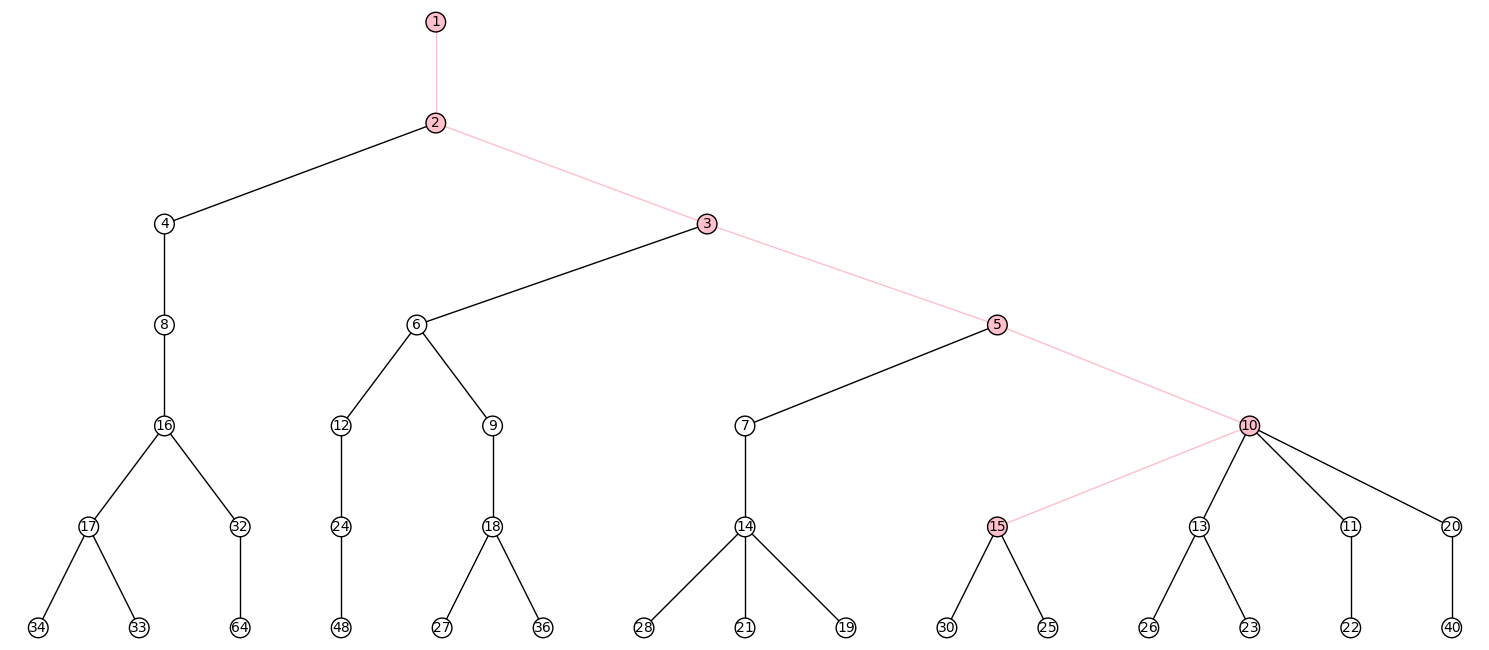

In [154]:
draw_tree(create_tree(6), 15)

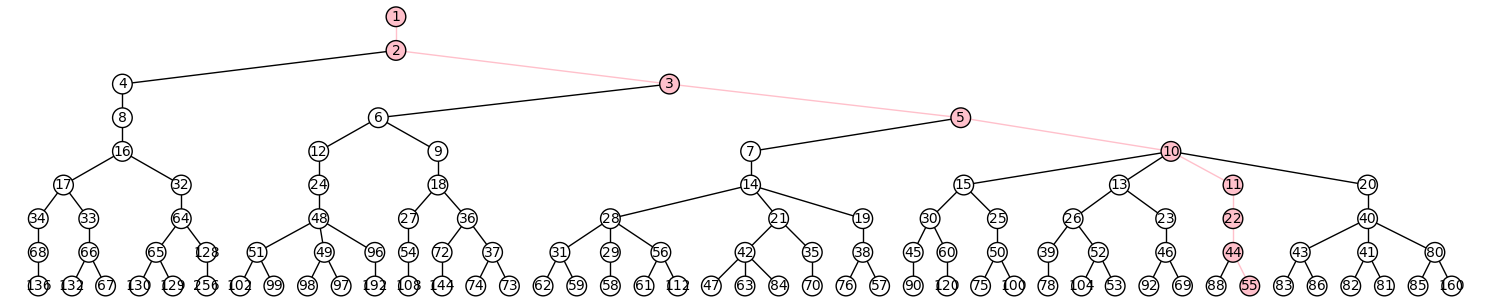

In [155]:
draw_tree(create_tree(8), 55)

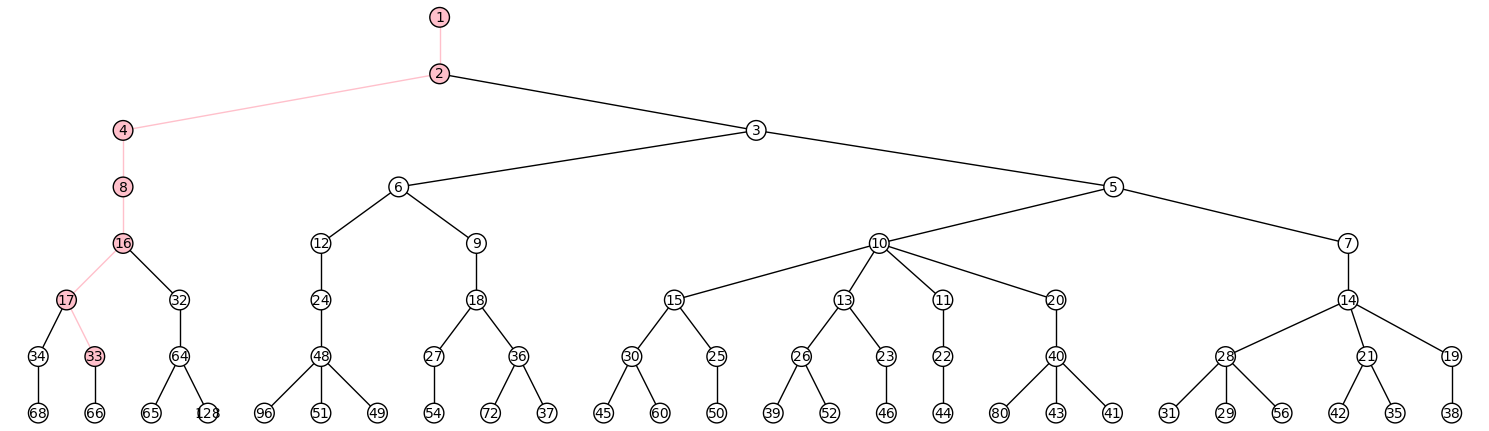

In [156]:
draw_tree(create_tree(7), 33)

In [5]:
get_path(create_tree(7), 33)

[1, 2, 4, 8, 16, 17, 33]

Для $n = 33$ получаем следующую последовательность итераций: $x, x^2, x^4, x^8, x^{16}, x^{17}, x^{33}$ \
Количество итераций = 7

### Вывод

Реализован метод дерева степеней. Представлина визуализация дерева и розовым указан путь для получения решения.Заметим, что дерево степеней по количеству операций не превышает бинарный метод.

## Выводы

В данной практической работе усвоены знания о работе алгоритмов вычисления одночленов за минимальное число операций. Были реализованы следующие методы: бинарный метод "SX", метод справа налево, метод множителей и метод степеней. Также были проведены сравнения методов по количеству операций и проведена их оценка.
Также можно сделать вывод, что самый эффективный метод - метод дерева степеней; метод возведения в степень справа налево оказался наименее эффективным.